In [3]:
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import keras
from sklearn.metrics import r2_score
from tensorflow.keras.optimizers import Adam
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.linear_model import LinearRegression
from tqdm.keras import TqdmCallback

#Data Import
df = pd.read_csv('auto-mpg-clean.csv', encoding= 'unicode_escape')
X, y = df.drop(['mpg'], axis =1), df['mpg']
#Normalize the Data
X = (X-X.min())/(X.max()-X.min())
 

def r2_adjusted(x, r2):
    """Calculates the R2 Adjusted"""
    m, n = x.shape
    r_df = (m-1)/(m-n)
    return 1-(r_df*(1-r2))
def coeff_determination(y, yhat):
    """Calculates R2"""
    from keras import backend as K
    SS_res = K.sum(K.square(y-yhat))
    SS_tot = K.sum(K.square(y -K.mean(yhat)))
    return (1-SS_res/(SS_tot + K.epsilon()))

def TwoL_NN(num_feat, act, epoch, learnrate):
    """ Creates the Sequential Model as dataset has one output, inputs are placed in the model
       then output layer. The optimizer used for the NN is Adam.A plot of MSE vs Epochs and 
       R2 vs Epochs is printed at the end. R2, R2 Bar and R2 CV are returned.
    """
    model = Sequential()
    model.add(Input(shape=(num_feat,)))         #Input Layer
    model.add(Dense(units=1))                   #Output Layer
    optimizer = Adam(learning_rate=learnrate)   #Adam used as Optimizer
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse', coeff_determination])
    fit_model = model.fit(x=x_train, y=y_train, epochs=epoch, batch_size=32, validation_split=0.2, verbose=0, callbacks=[TqdmCallback()])
    plt.clf()
    plt.plot([i for i in range(epoch)], fit_model.history['mse'], label="mse")
    plt.title(f"{act}: {learnrate}")
    plt.legend()
    plt.show()
    plt.plot([i for i in range(epoch)], fit_model.history['coeff_determination'], label="R2")
    plt.legend()
    return (fit_model.history['coeff_determination'][-1], r2_score(y_test, model(x_test)), r2_adjusted(x_train,fit_model.history['coeff_determination'][-1]))

# 2 Layer Model

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

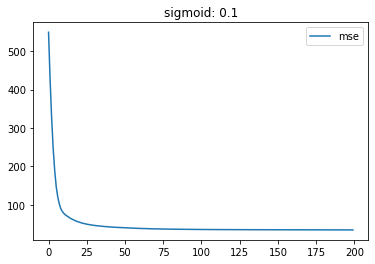

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

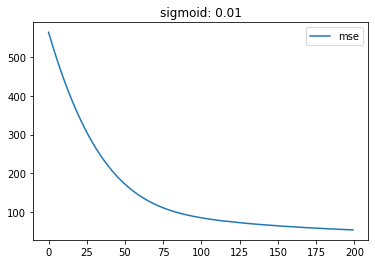

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

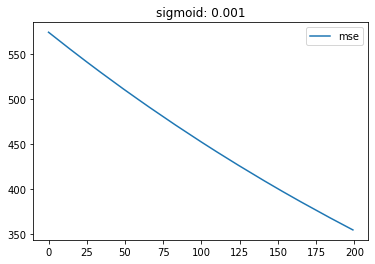

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

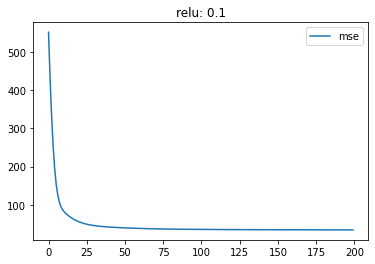

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

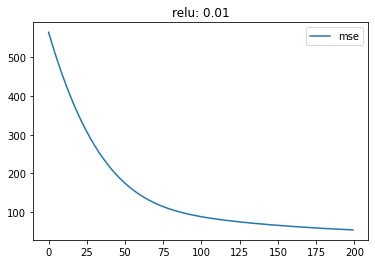

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

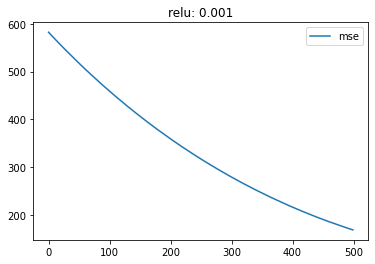

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

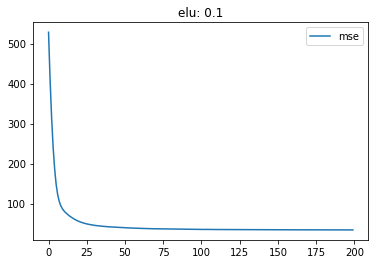

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

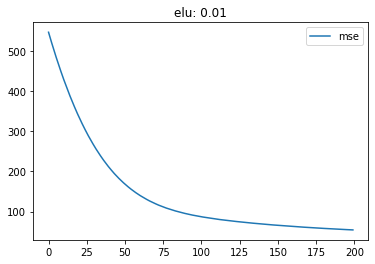

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

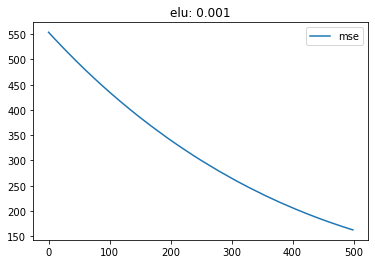

,Learning Rate,R2,R2 CV,R2 Adjusted
sigm,0.100,0.333573,-0.185031,0.320200
sigm,0.010,0.052701,-0.184861,0.033692
sigm,0.001,-0.019528,-5.412165,-0.039987
relu,0.100,0.336464,-0.193028,0.323149
relu,0.010,0.032452,-0.214070,0.013036
relu,0.001,-0.088820,-2.179354,-0.110669
elu,0.100,0.383947,-0.150622,0.371584
elu,0.010,0.035519,-0.207475,0.016165
elu,0.001,-0.145644,-2.049724,-0.168633


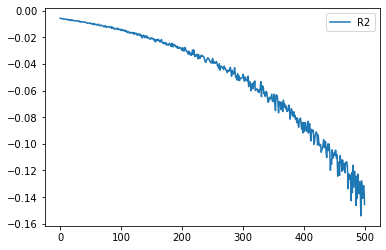

In [4]:
#Splitting training and testing sets (80/20)
x_train, y_train = X[-306:].to_numpy(), (y[-306:]).to_numpy()
x_test, y_test   = X[:-306].to_numpy(), (y[:-306]).to_numpy()

#Calling Neural Net Function for 3 different activation functions and 3 different learning rates.
sig1, sig_cv1, sig_bar1 = TwoL_NN(7, 'sigmoid', 200, 0.1)
sig2, sig_cv2, sig_bar2 = TwoL_NN(7, 'sigmoid', 200, 0.01)
sig3, sig_cv3, sig_bar3 = TwoL_NN(7, 'sigmoid', 200, 0.001)

relu1, relu_cv1, relu_bar1 = TwoL_NN(7, 'relu', 200, 0.1)
relu2, relu_cv2, relu_bar2 = TwoL_NN(7, 'relu', 200, 0.01)
relu3, relu_cv3, relu_bar3 = TwoL_NN(7, 'relu', 500,  0.001)

elu1, elu_cv1, elu_bar1 = TwoL_NN(7, 'elu', 200, 0.1)
elu2, elu_cv2, elu_bar2 = TwoL_NN(7, 'elu', 200, 0.01)
elu3, elu_cv3, elu_bar3 = TwoL_NN(7, 'elu', 500, 0.001)

#Output
R2s = pd.DataFrame({"Learning Rate" :[0.1,.01,0.001, 0.1,.01,0.001, 0.1,.01,0.001], 
               "R2":[sig1, sig2, sig3, relu1, relu2, relu3, elu1, elu2, elu3],
               "R2 CV":[sig_cv1, sig_cv2, sig_cv3, relu_cv1, relu_cv2, relu_cv3, elu_cv1, elu_cv2, elu_cv3],
               "R2 Adjusted":[sig_bar1,sig_bar2,sig_bar3,relu_bar1,relu_bar2,relu_bar3,elu_bar1,elu_bar2,elu_bar3]},
               index = ["sigm", "sigm", "sigm", "relu","relu","relu","elu", "elu", "elu"])
R2s

# Forward 2 Layer Model

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

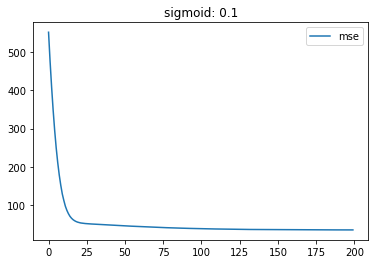

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

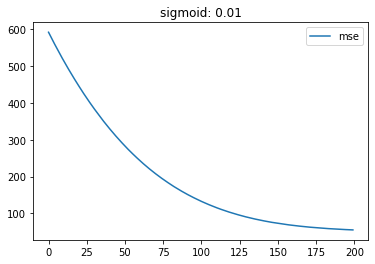

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

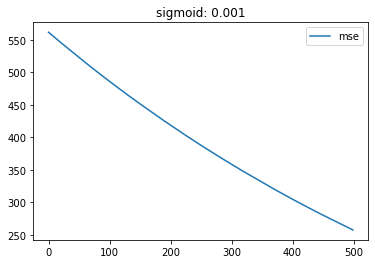

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

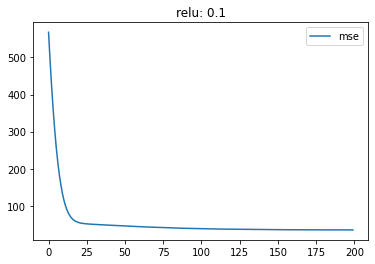

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

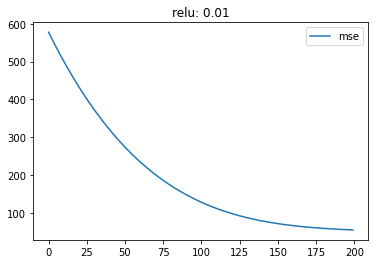

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

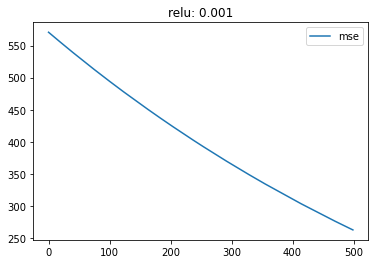

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

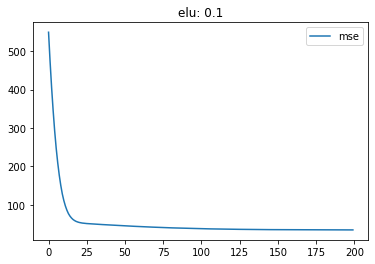

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

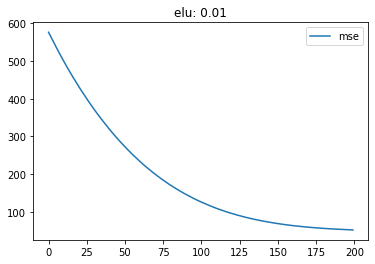

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

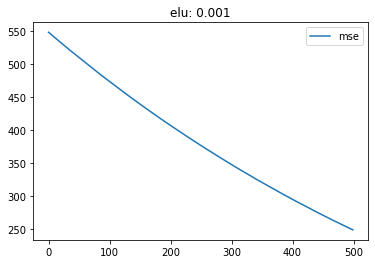

,Learning Rate,R2,R2 CV,R2 Adjusted
sigm,0.100,0.354169,-0.139675,0.349906
sigm,0.010,0.059130,-0.410933,0.052919
sigm,0.001,0.016639,-4.594451,0.010148
relu,0.100,0.346454,-0.147744,0.342140
relu,0.010,0.020947,-0.367637,0.014484
relu,0.001,0.023616,-4.591899,0.017171
elu,0.100,0.318877,-0.154673,0.314381
elu,0.010,0.100795,-0.428767,0.094859
elu,0.001,0.020994,-4.449582,0.014532


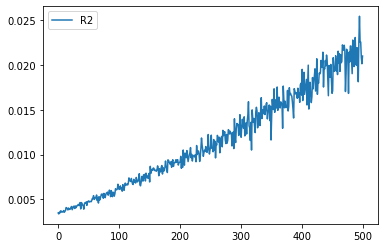

In [5]:
#Selecting features to feed the NN with forward selection and splitting training and testing sets (80/20)
reg = LinearRegression() 
sfs = SequentialFeatureSelector(estimator=reg)
sfs.fit(X,y)
forward = sfs.transform(X)
x_train, y_train = forward[-306:], (y[-306:]).to_numpy()
x_test, y_test   = forward[:-306], (y[:-306]).to_numpy()

#Calling Neural Net Function for 3 different activation functions and 3 different learning rates.
sig1, sig_cv1, sig_bar1 = TwoL_NN(3, 'sigmoid', 200, 0.1)
sig2, sig_cv2, sig_bar2 = TwoL_NN(3, 'sigmoid', 200, 0.01)
sig3, sig_cv3, sig_bar3 = TwoL_NN(3, 'sigmoid', 500, 0.001)

relu1, relu_cv1, relu_bar1 = TwoL_NN(3, 'relu', 200, 0.1)
relu2, relu_cv2, relu_bar2 = TwoL_NN(3, 'relu', 200, 0.01)
relu3, relu_cv3, relu_bar3 = TwoL_NN(3, 'relu', 500, 0.001)

elu1, elu_cv1, elu_bar1 = TwoL_NN(3, 'elu', 200, 0.1)
elu2, elu_cv2, elu_bar2 = TwoL_NN(3, 'elu', 200, 0.01)
elu3, elu_cv3, elu_bar3 = TwoL_NN(3, 'elu', 500, 0.001)

#Output
forward_R2s = pd.DataFrame({"Learning Rate" :[0.1,.01,0.001, 0.1,.01,0.001, 0.1,.01,0.001], 
               "R2":[sig1, sig2, sig3, relu1, relu2, relu3, elu1, elu2, elu3],
               "R2 CV":[sig_cv1, sig_cv2, sig_cv3, relu_cv1, relu_cv2, relu_cv3, elu_cv1, elu_cv2, elu_cv3],
               "R2 Adjusted":[sig_bar1,sig_bar2,sig_bar3,relu_bar1,relu_bar2,relu_bar3,elu_bar1,elu_bar2,elu_bar3]},
               index = ["sigm", "sigm", "sigm", "relu","relu","relu","elu", "elu", "elu"])

forward_R2s